# [FinalExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, July 14, 2022.**

**Student Name**  : Aurellia Vieryn <br>
**Student ID**    : 2440066626 <br>
**Video Link**    : https://binusianorg-my.sharepoint.com/personal/aurellia_vieryn001_binus_ac_id/_layouts/15/guestaccess.aspx?docid=007091f6757bc4dc09cb0e843bdec1060&authkey=AdPrgsirEFJCOv2dTLPPnaY&e=SbRWos   

* [Dataset Link](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data)
## <strong>Dataset Description</strong>
<br>
 <strong>a record of the crimes that have occurred in Chicago</strong>
 <br>
<ul><li><strong>Domestic :</strong> Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</li>
    <li><strong>Beat :</strong> Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.</li>
    <li><strong>District :</strong> Indicates the police district where the incident occurred</li>
    <li><strong>Ward :</strong> The ward(City Council District) where the incident occurred</li>
    <li><strong>Community Are :</strong> Indicates the community area where the incident occurred. Chicago has 77 community areas.</li>
    <li><strong>FBI Code :</strong> Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).</li>
    <li><strong>Date :</strong> A given month (1 : January, 12 : December); a given hour (1 to 23)</li>
</ul>

**NOTES:**
<li>You are required to build <strong>'the BEST and suitable'</strong> supervised machine learning model for the given dataset. The model may be used for the effective deployment of police officers in a city across several districts regarding the degree to which each area is prone to crime at a particular hour, day, and month. </li>
<li>Build multiple potentially suitable machine learning models (at least 2 different machine learning models).</li>
<li>You have to evaluate the models using at least 2 performance metrics before choose what you assume to be the `"best"` model for the given dataset.</li>

**HINT:** 
1. You need to generate the target feature by **performing feature engineering on `Date` and `Primary Type` features** to group crimes together
<br>
2. Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate</li>
<br>
3. You may need to check the data proportion in each class (imbalance/not)

## 1. Load the neccessary Libraries and Data (2 pts.)

#### Libraries

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

#### Get the Data

In [2]:
crimes = pd.read_csv("evenID.csv",sep=',')
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,861410,11476552,JB475560,10/14/2018 06:51:00 PM,039XX W OGDEN AVE,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,...,22.0,29.0,06,1150286.0,1889027.0,2018,10/21/2018 04:09:44 PM,41.851393,-87.723904,"(41.851393305, -87.723903515)"
1,783641,10828749,JA130110,01/25/2017 11:00:00 PM,011XX S OAKLEY BLVD,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,25.0,28.0,03,1161221.0,1894904.0,2017,02/14/2017 03:49:42 PM,41.867300,-87.683606,"(41.867300404, -87.683606131)"
2,650716,11031423,JA363907,07/26/2017 12:30:00 AM,018XX N CLARK ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,43.0,7.0,07,1174558.0,1912475.0,2017,02/10/2018 03:50:01 PM,41.915229,-87.634119,"(41.915228778, -87.634118723)"
3,496462,10430338,HZ168230,02/26/2016 03:00:00 AM,002XX W JACKSON BLVD,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,...,2.0,32.0,06,1174641.0,1898950.0,2016,02/10/2018 03:50:01 PM,41.878114,-87.634219,"(41.878113603, -87.634218691)"
4,946330,11361027,JB324433,06/26/2018 12:30:00 PM,0000X E MONROE ST,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,...,42.0,32.0,06,1176686.0,1899939.0,2018,07/03/2018 03:55:36 PM,41.880782,-87.626680,"(41.880781519, -87.626680112)"


The data successfully loaded.

## 2. Data Exploration (15 pts.)

#### Data Information

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1031744 non-null  int64  
 1   ID                    1031744 non-null  int64  
 2   Case Number           1031744 non-null  object 
 3   Date                  1031744 non-null  object 
 4   Block                 1031744 non-null  object 
 5   IUCR                  1031744 non-null  object 
 6   Primary Type          1031744 non-null  object 
 7   Description           1031744 non-null  object 
 8   Location Description  1028467 non-null  object 
 9   Arrest                1031744 non-null  bool   
 10  Domestic              1031744 non-null  bool   
 11  Beat                  1031744 non-null  int64  
 12  District              1031743 non-null  float64
 13  Ward                  1031735 non-null  float64
 14  Community Area        1031742 non-

From the information that we got above, we can tell that this dataset has a total of 23 columns with 1,031,744 entries. The data type for each column varies totalling to 2 booleans, 7 floats, 4 integers, and 10 objects. The clear categorical variables here are `IUCR`, `Primary Type`, `Location Description`, `Arrest`, `Domestic`, `Beat`, `District`, `Ward`, `Community Area`, `FBI Code`, and `Year`. The rest are not categorical variables but not continous either, so we can just say that it's kind of unique variables.

#### Looking Briefly at the Missing Values
We can also see that there is quite a lot of nulls count so we want to see how many percent of each column are null values.

In [4]:
null_percent = crimes.isnull().sum() * 100 / len(crimes)
print(null_percent)

Unnamed: 0              0.000000
ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.317618
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000097
Ward                    0.000872
Community Area          0.000194
FBI Code                0.000000
X Coordinate            1.224625
Y Coordinate            1.224625
Year                    0.000000
Updated On              0.000000
Latitude                1.224625
Longitude               1.224625
Location                1.224625
dtype: float64


Indeed there is quite a bit of null values we have to handle later on in the data preparation phase. We don't really wanna see the outliers in this dataset because it can be seen that most of the numerical variables are not continous. We also don't wnat to see using `.describe()` function because of the same reason. 

#### Data Description
We want to take a look our data that can be described here, but we will just select a few categorical variables that has less categories.

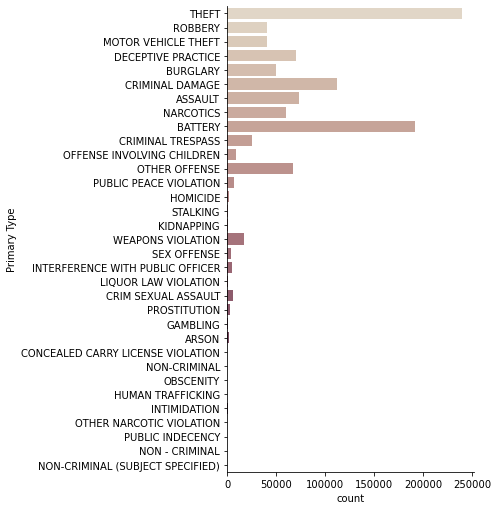

In [5]:
sns.catplot(y="Primary Type", kind="count", palette="ch:.25", data=crimes, orient="v", height=7)

The most count of the `Primary Type` column is Theft, followed by Battery. This means that most of the crime cases are theft cases.

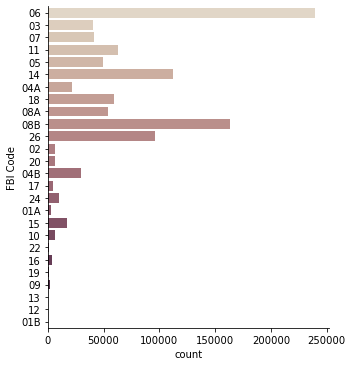

In [6]:
sns.catplot(y="FBI Code", kind="count", palette="ch:.25", data=crimes, orient="v")

The most count of the `FBI Code` column is 06, followed by 08B. This means that most of the crime cases are categorized as 06 Code.

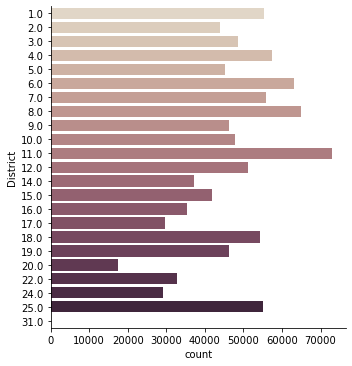

In [7]:
sns.catplot(y="District", kind="count", palette="ch:.25", data=crimes, orient="v", height=5)

The most count of the `District` column is District 11, followed by District 8. This means that the most crimes happened in District 11.

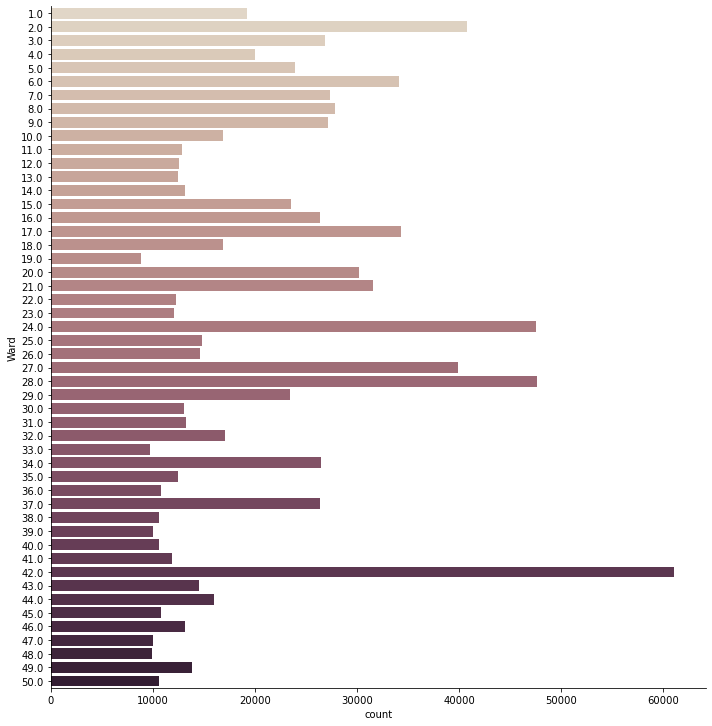

In [8]:
sns.catplot(y="Ward", kind="count", palette="ch:.25", data=crimes, orient="v", height=10)

The most count of the `District` column is Ward 41, followed by Ward 24 and 28. This means that the most crimes happened in Ward 41.

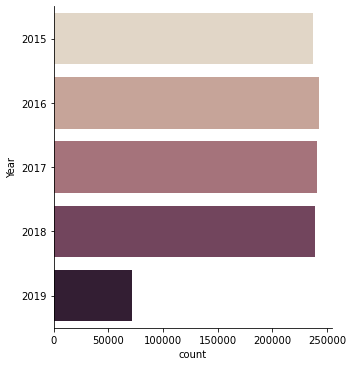

In [9]:
sns.catplot(y="Year", kind="count", palette="ch:.25", data=crimes, orient="v")

This means that the data is taken around 2015 until 2019, probably not until a full year of 2019 and also not a full year of 2015.

#### Correlation Heatmap

The main thing we want to see in the data exploration phase is the relationship between variables, so we would like to go on to check those soon. Before that, we want to see the correlation heatmap to help us decide which variables are kind of significant to each other.

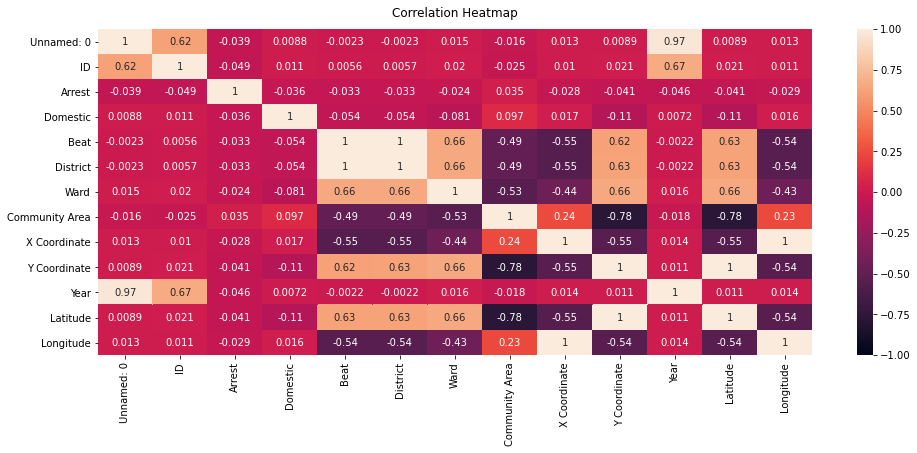

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(crimes.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Correlation Heatmap only shows the correlation between boolean, integer and float data types, so we have a total of 13 columns' correlation score with each other. There are variables that has the correlation value 1, so we can think about dropping one of them in the future, for example `X Coordinate` with `Longitude` and `Y Coordinate` with `Latitude`. We know that in reality X Coordinate with Longitude and Y Coordinate with Latitude are sort of similiar. 
<br><br>
The next variables that has the correlation 1 is `Beat` with `District`. From the columns explanation that was already provided, we know that beat is a part of a district, so it makes sense that they have a correlation of 1. For a high correlation score of 0.97, we have `Year` with `Unnamed: 0`, but since the column is unnamed, we can't know what that is.
<br><br>
The decent correlation score such around 0.6 are shown a lot in the heatmap, like `Latitude` with `Beat`, `District` and `Ward`. It is possible that it has a quite high correlation score because the columns are about pointing out locations where the crime happened. It is the same with `Y Coordinate` with `Beat`, `District` and `Ward`, but because `Y Coordinate` is literally `Latitude`, it has the same meaning. Also, there is some variables that has a high correlation with `ID` but we assume that `ID` contains of only unique variables and we will probably drop it later, so we don't need to look onto it. There is one negative correlation value that is quite high, which is -0.78 that is between `Community Area` and `Latitude` plus `Community Area` and `Y Coordinate`. This is the same reasoning probably with the ones before - because the columns are pointing out locations.
<br><br>
The rest of the correlationship are okay but we don't want to point out everything. We can now check the relationships visualization of the columns that we don't plan to drop to see how it goes.

#### Variables Relationship

The relationship that we want to see here is between categorical object columns, the first one is between `Primary Type` and `Arrest` to see which Primary Type has the most cases of being arrested.

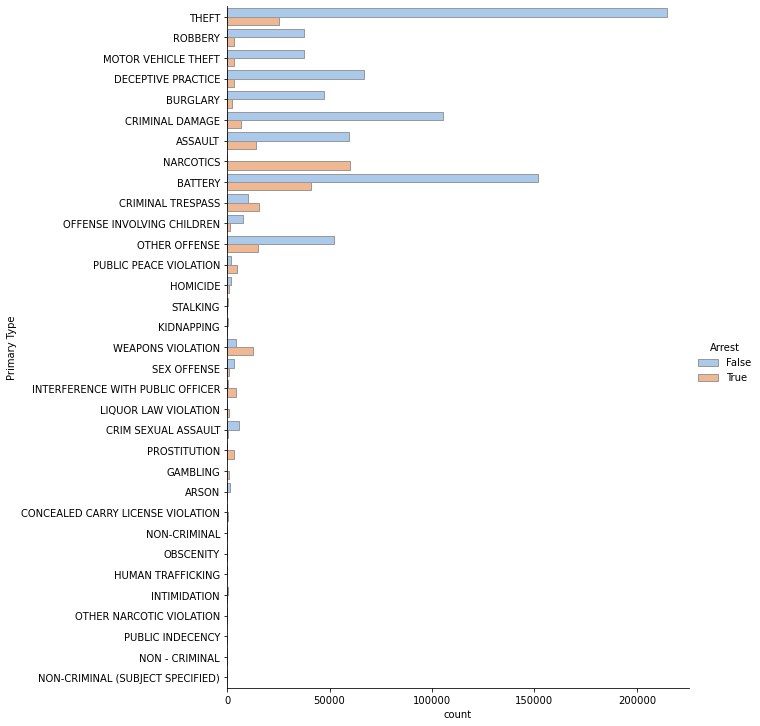

In [11]:
sns.catplot(y="Primary Type", hue="Arrest", kind="count",
            palette="pastel", edgecolor=".6",
            data=crimes, height=10)

The categorical plot shows that most of the times are not arrested. The arrested crime highest rate for `Primary Type` Narcotics - we can see that almost 100% are arrested - and then followed by Battery. We want to see whether every Narcotics case results to being arrest by seeing it manually.

In [12]:
crimes[(crimes['Primary Type'] == 'NARCOTICS') & (crimes['Arrest'] == 0)].shape

(24, 23)

In [13]:
crimes[(crimes['Primary Type'] == 'NARCOTICS') & (crimes['Arrest'] == 1)].shape

(59881, 23)

There is only 24 out of all Narcotics cases which were arrested, so we can conclude that Narcotics crime type has a very high rate of being arrested. We also want to see between `Primary Type` with `Domestic` which type is the most domestic-related.

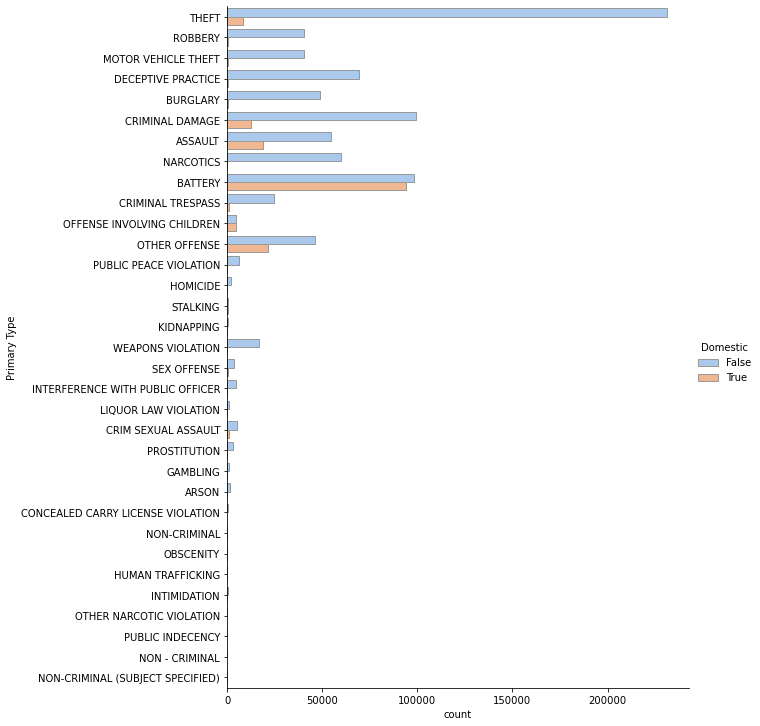

In [14]:
sns.catplot(y="Primary Type", hue="Domestic", kind="count",
            palette="pastel", edgecolor=".6",
            data=crimes, height=10)

The results show that Battery - the actual wrong act of physically harming someone - is mostly domestic-related, followed with Assault. Domestic means that the perperator lives in the same place or nearby as the victim. The next one we want to see is `FBI Code` and `Primary Type` because it looks kind of similar so we want to look more into it.

In [15]:
crimes['FBI Code'].unique()

array(['06', '03', '07', '11', '05', '14', '04A', '18', '08A', '08B',
       '26', '02', '20', '04B', '17', '24', '01A', '15', '10', '22', '16',
       '19', '09', '13', '12', '01B'], dtype=object)

There is a lot of unique values in `FBI Code` so we don't wanna plot the relationship plot. Instead, we take a quick look at the FBI Code list, and check if they are related or not. If they are totally related, we can drop the `FBI Code` column. 

In [16]:
crimes.loc[(crimes['FBI Code'] == '06')]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,861410,11476552,JB475560,10/14/2018 06:51:00 PM,039XX W OGDEN AVE,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,True,...,22.0,29.0,06,1150286.0,1889027.0,2018,10/21/2018 04:09:44 PM,41.851393,-87.723904,"(41.851393305, -87.723903515)"
3,496462,10430338,HZ168230,02/26/2016 03:00:00 AM,002XX W JACKSON BLVD,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,...,2.0,32.0,06,1174641.0,1898950.0,2016,02/10/2018 03:50:01 PM,41.878114,-87.634219,"(41.878113603, -87.634218691)"
4,946330,11361027,JB324433,06/26/2018 12:30:00 PM,0000X E MONROE ST,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,...,42.0,32.0,06,1176686.0,1899939.0,2018,07/03/2018 03:55:36 PM,41.880782,-87.626680,"(41.880781519, -87.626680112)"
7,540164,11184103,JA558070,12/20/2017 11:00:00 AM,024XX W LUNT AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,...,50.0,2.0,06,1158733.0,1946390.0,2017,05/04/2018 03:51:04 PM,42.008633,-87.691324,"(42.008632687, -87.691324437)"
16,646885,11036332,JA370307,07/30/2017 08:40:00 PM,038XX S GILES AVE,0810,THEFT,OVER $500,STREET,False,...,3.0,35.0,06,1178891.0,1879610.0,2017,02/10/2018 03:50:01 PM,41.824947,-87.619204,"(41.824947313, -87.619204429)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031725,704617,10950102,JA269701,05/18/2017 06:55:00 PM,005XX W POLK ST,0820,THEFT,$500 AND UNDER,STREET,False,...,2.0,28.0,06,1173096.0,1896717.0,2017,02/10/2018 03:50:01 PM,41.872020,-87.639958,"(41.872020496, -87.639957754)"
1031739,438936,10525983,HZ267425,05/16/2016 08:50:00 PM,015XX E 53RD ST,0890,THEFT,FROM BUILDING,OTHER,False,...,4.0,41.0,06,1187505.0,1870429.0,2016,02/10/2018 03:50:01 PM,41.799553,-87.587895,"(41.799553224, -87.587894753)"
1031740,324649,10708413,HZ465384,10/07/2016 06:00:00 PM,066XX W FULLERTON AVE,0870,THEFT,POCKET-PICKING,SMALL RETAIL STORE,False,...,36.0,19.0,06,NaN,NaN,2016,10/14/2016 04:07:57 PM,NaN,NaN,NaN
1031741,382880,10612722,HZ365526,07/26/2016 03:45:00 PM,0000X W MADISON ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,...,42.0,32.0,06,1176107.0,1900380.0,2016,02/10/2018 03:50:01 PM,41.882005,-87.628793,"(41.882004711, -87.628792836)"


From the preview, the primary type for code 06 is Theft. So let's see if all of Code 06 are Theft cases.

In [17]:
crimes.loc[(crimes['FBI Code'] == '06') & (crimes['Primary Type'] != 'THEFT')]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


It is confirmed that Code 06 is Theft cases. In that case, `FBI Code` is basically similar as `Primary Type`. Therefore, we already has an understanding of what our data is like and we can proceed to do data preparation

## 3. Data Preparation (30 pts.)

#### Dropping Columns

Before dealing with missing values, we would like to drop some columns that we find not that relevant. The first ones are `Unnamed: 0`, `ID`, `Updated On` and `Case Number`, because `Unnamed: 0` is not clear and the other two must contains only unique variables. The next variables we will drop includes `Block`, `IUCR`, `Description`, `Location Description`, `Beat`, `X Coordinate`, `Community Area`, `Y Coordinate`, `Location`, `Langitude`, `Longitude`, and `FBI Code` because the informations are similiar to some columns. We also want to drop `Arrest`and `Domestic` because it won't have too much significance on the crime rate which will be our target variable. 

In [18]:
crimes = crimes.drop(columns=['Unnamed: 0', 'ID', 'Updated On', 'Case Number',
                     'Block', 'IUCR', 'Description', 'Location Description',
                     'Beat', 'X Coordinate', 'Y Coordinate', 'Location',
                     'Latitude', 'Longitude', 'FBI Code', 'Arrest', 'Community Area',
                              'Domestic'])

In [19]:
crimes

,Date,Primary Type,District,Ward,Year
0,10/14/2018 06:51:00 PM,THEFT,10.0,22.0,2018
1,01/25/2017 11:00:00 PM,ROBBERY,12.0,25.0,2017
2,07/26/2017 12:30:00 AM,MOTOR VEHICLE THEFT,18.0,43.0,2017
3,02/26/2016 03:00:00 AM,THEFT,1.0,2.0,2016
4,06/26/2018 12:30:00 PM,THEFT,1.0,42.0,2018
...,...,...,...,...,...
1031739,05/16/2016 08:50:00 PM,THEFT,2.0,4.0,2016
1031740,10/07/2016 06:00:00 PM,THEFT,25.0,36.0,2016
1031741,07/26/2016 03:45:00 PM,THEFT,1.0,42.0,2016
1031742,10/22/2015 08:00:00 AM,THEFT,6.0,6.0,2015


#### Handling Missing Values

We can deal with the missing values we saw on the data exploration phase before with the mode, because most of them are categorical.

In [20]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Date          1031744 non-null  object 
 1   Primary Type  1031744 non-null  object 
 2   District      1031743 non-null  float64
 3   Ward          1031735 non-null  float64
 4   Year          1031744 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 39.4+ MB


In [21]:
crimes['District'] = crimes['District'].fillna(crimes['District'].mode()[0])
crimes['Ward'] = crimes['Ward'].fillna(crimes['Ward'].mode()[0])

In [22]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031744 entries, 0 to 1031743
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Date          1031744 non-null  object 
 1   Primary Type  1031744 non-null  object 
 2   District      1031744 non-null  float64
 3   Ward          1031744 non-null  float64
 4   Year          1031744 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 39.4+ MB


#### Changing Data Type and Extracting

Then, we want to change `Primary Type` to numerical categories, and also make new columns from `Date`, like particular hour, day (weekday and weekend) and month. We can start by making new columns of `Date`.

In [23]:
crimes['DateTime'] = pd.to_datetime(crimes['Date'])

crimes['Day'] = crimes['DateTime'].dt.weekday
crimes['Month'] = crimes['DateTime'].dt.month
crimes['Hour'] = crimes['DateTime'].dt.hour

crimes[['DateTime', 'Month', 'Day', 'Hour']].head()

,DateTime,Month,Day,Hour
0,2018-10-14 18:51:00,10,6,18
1,2017-01-25 23:00:00,1,2,23
2,2017-07-26 00:30:00,7,2,0
3,2016-02-26 03:00:00,2,4,3
4,2018-06-26 12:30:00,6,1,12


In [24]:
def weekday_or_no(x):
    if(x<=5):
        return 1
    else:
        return 0
    
crimes['Weekday'] = crimes['Day'].apply(weekday_or_no)

def time_of_the_day(x):
    if(x>5 and x<=18):
        return 0
    else:
        return 1
    
crimes['Time of the Day'] = crimes['Hour'].apply(time_of_the_day)

crimes[['DateTime', 'Month', 'Weekday', 'Time of the Day']].head()

,DateTime,Month,Weekday,Time of the Day
0,2018-10-14 18:51:00,10,0,0
1,2017-01-25 23:00:00,1,1,1
2,2017-07-26 00:30:00,7,1,1
3,2016-02-26 03:00:00,2,1,1
4,2018-06-26 12:30:00,6,1,0


Next we can continue with converting `Primary Type` to numerical but still categorical.

In [25]:
crimes['Primary Type'].unique()

array(['THEFT', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'BURGLARY', 'CRIMINAL DAMAGE', 'ASSAULT', 'NARCOTICS', 'BATTERY',
       'CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE',
       'PUBLIC PEACE VIOLATION', 'HOMICIDE', 'STALKING', 'KIDNAPPING',
       'WEAPONS VIOLATION', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'PROSTITUTION', 'GAMBLING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'OBSCENITY',
       'HUMAN TRAFFICKING', 'INTIMIDATION', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'NON - CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [26]:
crimes['Primary Type'].nunique()

33

In [27]:
crimes['Primary Type'].replace(['THEFT', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
                         'BURGLARY', 'CRIMINAL DAMAGE', 'ASSAULT', 'NARCOTICS', 'BATTERY',
                         'CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE',
                         'PUBLIC PEACE VIOLATION', 'HOMICIDE', 'STALKING', 'KIDNAPPING',
                         'WEAPONS VIOLATION', 'SEX OFFENSE',
                         'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
                         'CRIM SEXUAL ASSAULT', 'PROSTITUTION', 'GAMBLING', 'ARSON',
                         'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'OBSCENITY',
                         'HUMAN TRAFFICKING', 'INTIMIDATION', 'OTHER NARCOTIC VIOLATION',
                         'PUBLIC INDECENCY', 'NON - CRIMINAL',
                         'NON-CRIMINAL (SUBJECT SPECIFIED)'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], inplace=True)

In [28]:
crimes.head()

,Date,Primary Type,District,Ward,Year,DateTime,Day,Month,Hour,Weekday,Time of the Day
0,10/14/2018 06:51:00 PM,0,10.0,22.0,2018,2018-10-14 18:51:00,6,10,18,0,0
1,01/25/2017 11:00:00 PM,1,12.0,25.0,2017,2017-01-25 23:00:00,2,1,23,1,1
2,07/26/2017 12:30:00 AM,2,18.0,43.0,2017,2017-07-26 00:30:00,2,7,0,1,1
3,02/26/2016 03:00:00 AM,0,1.0,2.0,2016,2016-02-26 03:00:00,4,2,3,1,1
4,06/26/2018 12:30:00 PM,0,1.0,42.0,2018,2018-06-26 12:30:00,1,6,12,1,0


#### Crime Rate

We now want to calculate our crime rate by using the variables in our cleaned data, so we will make a new dataset that will use all variables except `Primary Type` and `Day`, then make `Primary Type` as the variable that will be counted. We will also group by the variables, and the aggregate will be `Primary Type`.

In [29]:
crime_rate = crimes.groupby(['Month','Weekday','Time of the Day','District','Year','Ward'], as_index=False).agg({"Primary Type":"count"})
crime_rate = crime_rate.sort_values(by=['District'], ascending=False)
crime_rate.head()

,Month,Weekday,Time of the Day,District,Year,Ward,Primary Type
9497,4,1,1,31.0,2015,14.0,1
8872,4,1,0,31.0,2016,6.0,1
16936,8,1,0,31.0,2015,17.0,1
16937,8,1,0,31.0,2018,41.0,1
15006,7,1,0,31.0,2016,6.0,3


In [30]:
crime_rate = crime_rate[['Month','Weekday','Time of the Day','District','Year','Ward', 'Primary Type']]
crime_rate.head()
crime_rate.shape

(25147, 7)

We put the table back to make a new column, that is the level of crime rate. It was pre-defined in the question sheet, and here it is: <br> <br>
Level of Crime Rate:
<ul><li><strong>0-14 : </strong>Low Crime Rate</li>
<li><strong>15-33 : </strong>Medium Crime Rate</li>
<li><strong>34 and above : </strong>High Crime Rate

Now we can make a function that will assign the level of crime rate, with `0 = Low`, `1 = Medium` and `2 = High`.

In [31]:
def crime_rate_level(x):
    if(x<=14):
        return 0
    elif(x>14 and x<=33):
        return 1
    else:
        return 2
crime_rate['Crime Rate'] = crime_rate['Primary Type'].apply(crime_rate_level)
crime_rate = crime_rate[['Month','Weekday','Time of the Day','District','Year','Ward', 'Primary Type','Crime Rate']]
crime_rate.head()

,Month,Weekday,Time of the Day,District,Year,Ward,Primary Type,Crime Rate
9497,4,1,1,31.0,2015,14.0,1,0
8872,4,1,0,31.0,2016,6.0,1,0
16936,8,1,0,31.0,2015,17.0,1,0
16937,8,1,0,31.0,2018,41.0,1,0
15006,7,1,0,31.0,2016,6.0,3,0


Hence, we will use classification algorithm to train and test our dataset later on. Since our target variable is ready, we can split our data into training and testing sets.

#### Train-Test Splitting
We will use the `crime_rate` dataset we got to train and test. Also we know that our target variable (Y) is Crime Rate, and the rest minus `Primary Type` will be the independent variables. The training set will be 80% and the testing dataset is 20% with random state 42.

In [32]:
X = crime_rate[['Month','Weekday','Time of the Day','District','Year','Ward']]
y = crime_rate['Crime Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalize Data

Before making the models, we must normalize our X data first so that it will be easier for the machine to compare.

In [33]:
normalizer = preprocessing.Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

#### Handling Imbalanced Dataset

We want to check whether out data is imbalanced, or not by seeing the target variable.

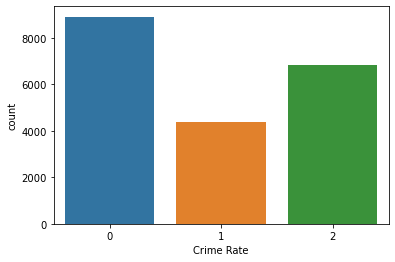

In [34]:
sns.countplot(y_train)

The data is quite balanced so we don't need to handle any imbalance, now we would like to do feature engineering on `Date` and `Primary Type` to create our target variable which is `Crime Rate`.

## 4. Build and Assess the machine learning models (35 pts.)

**You have to evaluate the machine learning models using at least two performance metrics (for example: precision and recall)**. 

### First Model : Decision Tree

In [35]:
model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train,y_train)
print('Decision Tree Accuracy:', model_dt.score(X_test,y_test))

Decision Tree Accuracy: 0.8341948310139164


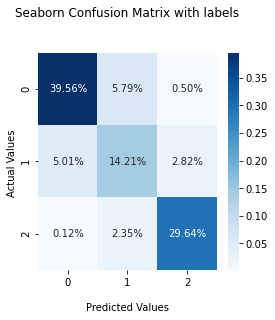

In [36]:
dt_pred = model_dt.predict(X_test)
cf_matrix = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2'])
ax.yaxis.set_ticklabels(['0','1','2'])

plt.show()

From the result, we can see that Decision Tree has an accuracy around 83.42% using standard parameters and we also can see the percentage of correct predicted per category in the confusion matrix. 

In [37]:
dt_recall = ((cf_matrix[0][0])/(cf_matrix[0][0]+cf_matrix[1][0]+cf_matrix[2][0])+(cf_matrix[1][1])/(cf_matrix[0][1]+cf_matrix[1][1]+cf_matrix[2][1])+(cf_matrix[2][2])/(cf_matrix[2][2]+cf_matrix[0][2]+cf_matrix[1][2]))/3
print("Decision Tree Unweighted Average Recall: ", dt_recall)

Decision Tree Unweighted Average Recall:  0.8068761831988978


In conclusion, the Decision Tree Model has an accuracy of 83.42% and a balanced accuracy (Unweighted Average Recall) of 80.69%.

### Second Model : Random Forest

In [38]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train,y_train)
print('Random Forest Accuracy:', model_rf.score(X_test,y_test))

Random Forest Accuracy: 0.8582504970178927


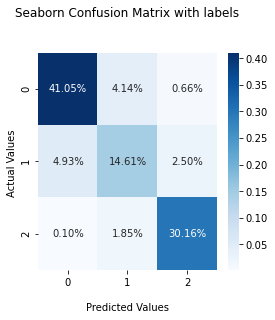

In [39]:
rf_pred = model_rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2'])
ax.yaxis.set_ticklabels(['0','1','2'])

plt.show()

From the result, we can see that Random Forest has an accuracy around 85.83% using standard parameters and we also can see the percentage of correct predicted per category in the confusion matrix. 

In [40]:
rf_recall = ((cf_matrix[0][0])/(cf_matrix[0][0]+cf_matrix[1][0]+cf_matrix[2][0])+(cf_matrix[1][1])/(cf_matrix[0][1]+cf_matrix[1][1]+cf_matrix[2][1])+(cf_matrix[2][2])/(cf_matrix[2][2]+cf_matrix[0][2]+cf_matrix[1][2]))/3
print("Random Forest Unweighted Average Recall: ", rf_recall)

Random Forest Unweighted Average Recall:  0.8351483030059533


In conclusion, the Random Forest Model has an accuracy of 85.83% and a balanced accuracy (Unweighted Average Recall) of 83.51%.

## 5. Choose your Final Model (3 pts.)

**You finally have your final model. Write comments to justify your final model**

In [41]:
print('Decision Tree Accuracy:', model_dt.score(X_test,y_test))
print('Random Forest Accuracy:', model_rf.score(X_test,y_test))
print('Final Model Accuracy:', max(model_dt.score(X_test,y_test), model_rf.score(X_test,y_test)))

Decision Tree Accuracy: 0.8341948310139164
Random Forest Accuracy: 0.8582504970178927
Final Model Accuracy: 0.8582504970178927


In [42]:
print('Decision Tree Unweighted Average Recall:', dt_recall)
print('Random Forest Unweighted Average Recall:', rf_recall)
print('Final Model Unweighted Average Recall:', max(dt_recall, rf_recall))

Decision Tree Unweighted Average Recall: 0.8068761831988978
Random Forest Unweighted Average Recall: 0.8351483030059533
Final Model Unweighted Average Recall: 0.8351483030059533


Since Random Forest Classifier has a slight higher accuracy and balanced accuracy than Decision Tree Classifier, we will select Random Forest Classifier as our final model with an accuracy around 85.83% and balanced accuracy around 83.51%.